In [1]:
from functools import partial

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PowerTransformer

from statsmodels.tsa.stattools import adfuller

In [20]:
TIME_STEPS = 250

WINDOWS = [8, 12]

In [24]:
def get_rolling(series, window, function):
    rolling = []
    for idx in range(window, len(series)):
        rolling.append([idx,function(series[idx-window:idx])])
    return np.array(rolling)

def get_rolling_averaged(series, window):
    rolling = []
    weights = np.arange(window) ** 2
    for idx in range(window, len(series)):
        rolling.append([idx,np.average(series[idx-window:idx], weights=weights)])
    return np.array(rolling)

def plot_series(series):
    print(f'Average Mean {series.mean()}')
    print(f'Average Variance {series.std()}')
    fig, axs = plt.subplots(2,1,figsize=(15,6))
    axs[0].plot(np.arange(len(series)), series, label='series')
    for win in WINDOWS:
        data = get_rolling(series, win, np.mean)
        axs[0].plot(data[:,0], data[:,1], label=f'rolling-mean-{win}')
    for win in WINDOWS:
        data = get_rolling(series, win, np.std)
        axs[0].plot(data[:,0], data[:,1], label=f'rolling-std-{win}')
    axs[0].legend(loc='best')
    
    axs[1].hist(data[:,1], density=True, bins=30)  # density=False would make counts
    axs[1].set_ylabel('Probability')
    axs[1].set_xlabel('Data');
    
    plt.show()
    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    

# Linear Trend Time Series

## Additive

### Plain Series

Average Mean 66.53912076070917
Average Variance 36.29739594592252


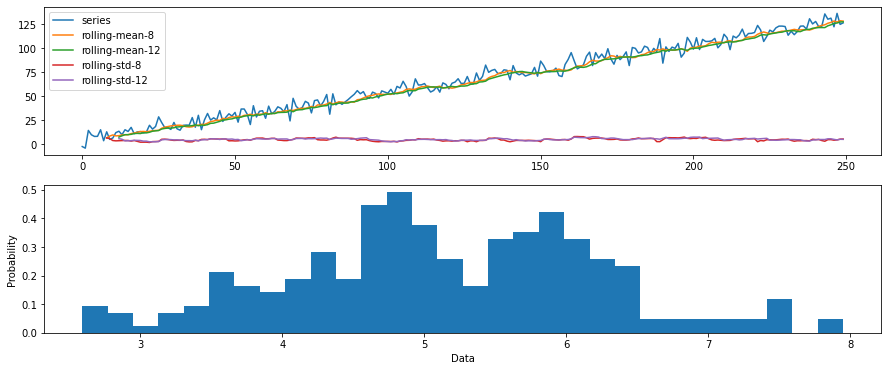

Results of Dickey-Fuller Test:
Test Statistic                   0.001968
p-value                          0.958695
#Lags Used                      10.000000
Number of Observations Used    239.000000
Critical Value (1%)             -3.458011
Critical Value (5%)             -2.873710
Critical Value (10%)            -2.573256
dtype: float64


In [25]:
noise = np.random.normal(scale=5.0,size=(TIME_STEPS,))
trend = 0.5 * np.arange(TIME_STEPS) + 4
series = trend + noise
plot_series(series)

### Removing the rolling mean

Average Mean 3.256336308335765
Average Variance 5.386044198243997


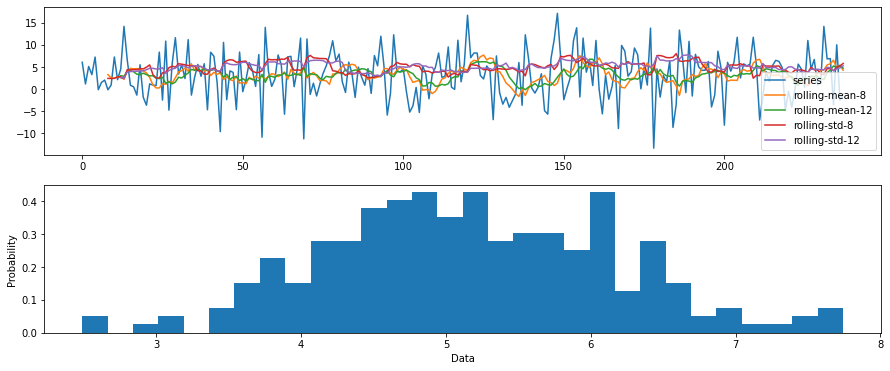

Results of Dickey-Fuller Test:
Test Statistic                -1.681803e+01
p-value                        1.184431e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.370000e+02
Critical Value (1%)           -3.458247e+00
Critical Value (5%)           -2.873814e+00
Critical Value (10%)          -2.573311e+00
dtype: float64


In [26]:
window = 12
trend = get_rolling(series, window, np.mean)
detrended_series = series[window:] - trend[:,1]
plot_series(detrended_series)

(238, 2)
Average Mean 1.6921649084014765
Average Variance 5.5855377533961565


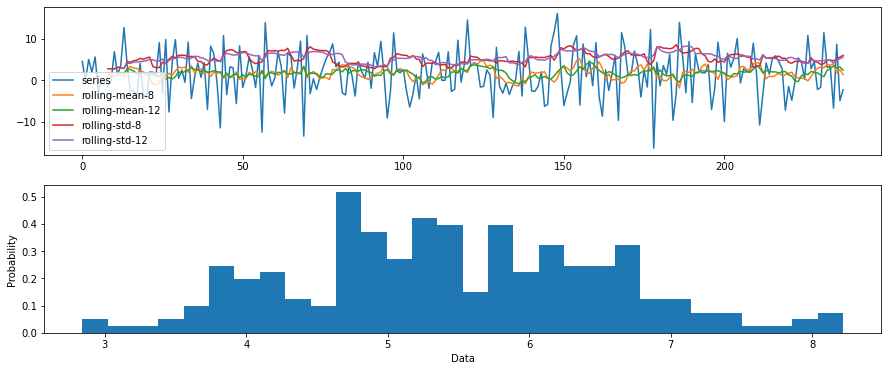

Results of Dickey-Fuller Test:
Test Statistic                -1.287795e+01
p-value                        4.725227e-24
#Lags Used                     1.000000e+00
Number of Observations Used    2.360000e+02
Critical Value (1%)           -3.458366e+00
Critical Value (5%)           -2.873866e+00
Critical Value (10%)          -2.573339e+00
dtype: float64


In [27]:
window = 12
trend = get_rolling_averaged(series, window)
print(trend.shape)
detrended_series = series[window:] - trend[:,1]
plot_series(detrended_series)

### Differencing the series

Average Mean 0.5163084388179717
Average Variance 7.640873740079433


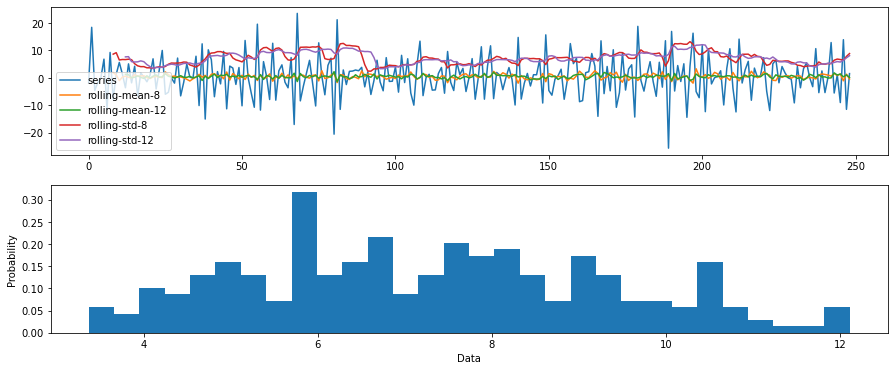

Results of Dickey-Fuller Test:
Test Statistic                -8.473594e+00
p-value                        1.455394e-13
#Lags Used                     9.000000e+00
Number of Observations Used    2.390000e+02
Critical Value (1%)           -3.458011e+00
Critical Value (5%)           -2.873710e+00
Critical Value (10%)          -2.573256e+00
dtype: float64


In [28]:
differenced_series = np.diff(series, 1)
plot_series(differenced_series)

Average Mean -2.2293635032633665e-17
Average Variance 1.0


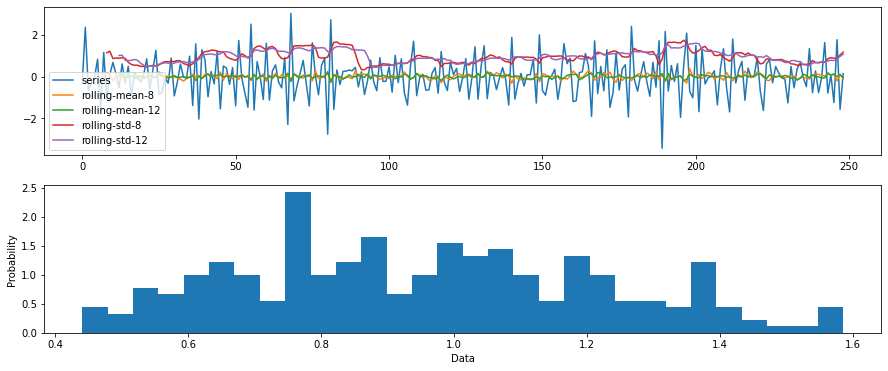

Results of Dickey-Fuller Test:
Test Statistic                -8.473594e+00
p-value                        1.455394e-13
#Lags Used                     9.000000e+00
Number of Observations Used    2.390000e+02
Critical Value (1%)           -3.458011e+00
Critical Value (5%)           -2.873710e+00
Critical Value (10%)          -2.573256e+00
dtype: float64


In [29]:
differenced_series = np.diff(series, 1)
differenced_series = (differenced_series - np.mean(differenced_series)) / np.std(differenced_series)
plot_series(differenced_series)

## Multiplicative

### Plain Series

Average Mean 877.6590523190793
Average Variance 474.67161866273017


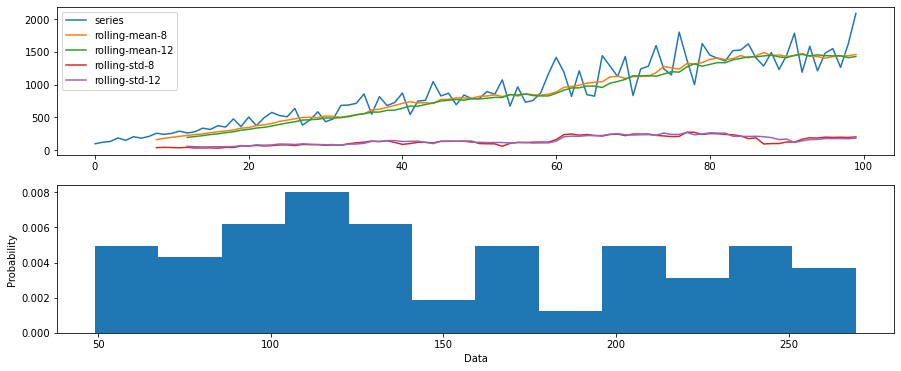

Results of Dickey-Fuller Test:
Test Statistic                 -0.780991
p-value                         0.824642
#Lags Used                      7.000000
Number of Observations Used    92.000000
Critical Value (1%)            -3.503515
Critical Value (5%)            -2.893508
Critical Value (10%)           -2.583824
dtype: float64


In [9]:
noise = np.random.normal(loc=30,scale=5.0,size=(TIME_STEPS,))
trend = 0.5 * np.arange(TIME_STEPS) + 4
series = trend * noise
plot_series(series)

### Removing the rolling mean

Average Mean 1.1568580283379102
Average Variance 0.229164656228008


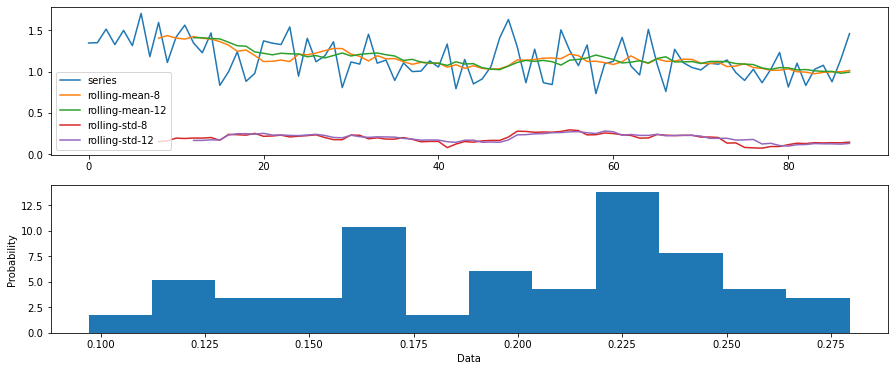

Results of Dickey-Fuller Test:
Test Statistic                -7.956400e+00
p-value                        3.029167e-12
#Lags Used                     0.000000e+00
Number of Observations Used    8.700000e+01
Critical Value (1%)           -3.507853e+00
Critical Value (5%)           -2.895382e+00
Critical Value (10%)          -2.584824e+00
dtype: float64


In [10]:
window = 12
trend = get_rolling(series, window, np.mean)
detrended_series = series[window:] / trend[:,1]
plot_series(detrended_series)

(88, 2)
Average Mean 1.0794605678960472
Average Variance 0.20245801720902054


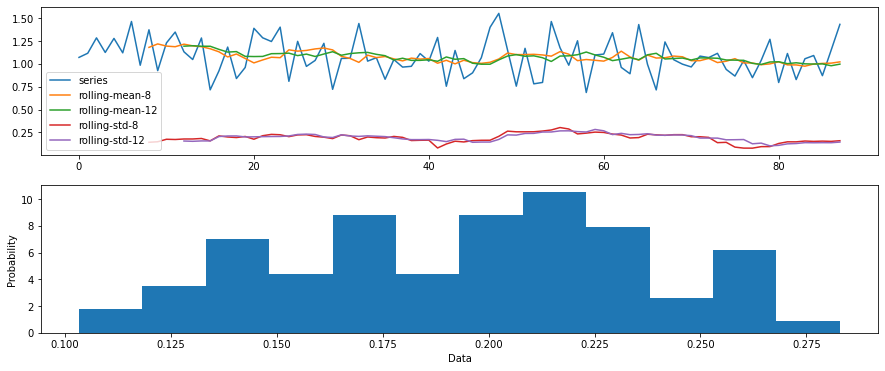

Results of Dickey-Fuller Test:
Test Statistic                 -5.059362
p-value                         0.000017
#Lags Used                      4.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


In [11]:
window = 12
trend = get_rolling_averaged(series, window)
print(trend.shape)
detrended_series = series[window:] / trend[:,1]
plot_series(detrended_series)

### Differencing the series

Average Mean 20.095594533528498
Average Variance 241.79647009396592


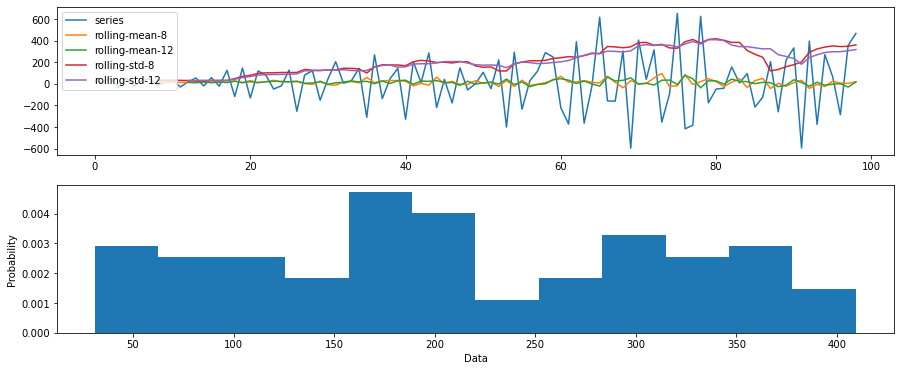

Results of Dickey-Fuller Test:
Test Statistic                -8.032645e+00
p-value                        1.939753e-12
#Lags Used                     6.000000e+00
Number of Observations Used    9.200000e+01
Critical Value (1%)           -3.503515e+00
Critical Value (5%)           -2.893508e+00
Critical Value (10%)          -2.583824e+00
dtype: float64


In [12]:
differenced_series = np.diff(series, 1)
plot_series(differenced_series)

Average Mean 8.971499188890155e-18
Average Variance 1.0


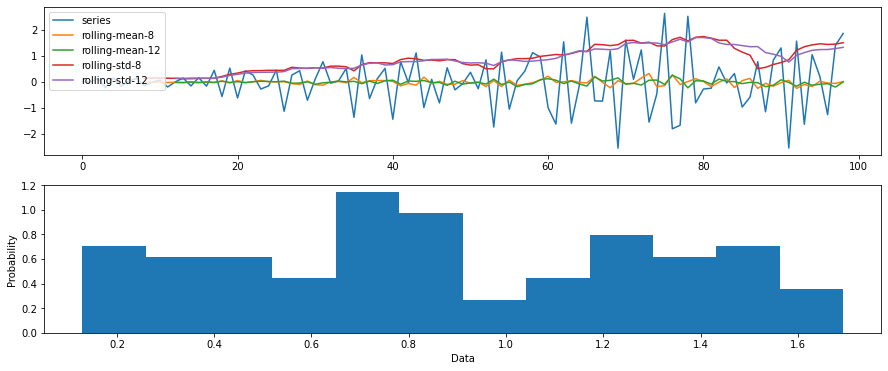

Results of Dickey-Fuller Test:
Test Statistic                -8.032645e+00
p-value                        1.939753e-12
#Lags Used                     6.000000e+00
Number of Observations Used    9.200000e+01
Critical Value (1%)           -3.503515e+00
Critical Value (5%)           -2.893508e+00
Critical Value (10%)          -2.583824e+00
dtype: float64


In [13]:
differenced_series = np.diff(series, 1)
differenced_series = (differenced_series - np.mean(differenced_series)) / np.std(differenced_series)
plot_series(differenced_series)